In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

SEED = 42


In [2]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

print(df_train.columns)
print(df_test.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Testing

In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_train.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)
df_train.drop('SibSp', axis=1, inplace=True)
df_test.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)
df_train.drop('Fare', axis=1, inplace=True)
df_test.drop('Fare', axis=1, inplace=True)

In [ ]:
df_train.head()

Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0

In [ ]:
y = df_train['Survived']
df_train.drop('Survived', axis=1, inplace=True)

In [ ]:
X_train = df_train
X_test = df_test
y_train = y

In [ ]:

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

In [ ]:
X_train['Sex']= X_train['Sex'].replace({'male': 0, 'female': 1})
X_test['Sex']= X_test['Sex'].replace({'male': 0, 'female': 1})

In [ ]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, ParameterSampler, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import time
from sklearn.metrics import f1_score
# –î–µ–ª–∏–º –Ω–∞ train –∏ holdout
X_tr, X_hold, y_tr, y_hold = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)
param_dist = {
    'n_estimators': np.arange(50, 301, 25),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(2, 7),
    'subsample': np.linspace(0.6, 1.0, 5),
    'min_samples_leaf': np.arange(1, 11),
    'min_samples_split': np.arange(2, 21),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
    'ccp_alpha': np.linspace(0.0, 0.01, 5)
}
N_TRIALS = 50
N_FOLDS = 5
cv = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
sampler = list(ParameterSampler(param_dist, n_iter=N_TRIALS, random_state=42))

best_score = 0
best_params = None

print("üîç –ù–∞—á–∏–Ω–∞–µ–º —Ä—É—á–Ω–æ–π –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...\n")
for i, params in enumerate(sampler, 1):
    print(f"üîÅ [{i}/{N_TRIALS}] –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {params}")
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_tr, y_tr), 1):
        X_fold_train, X_fold_val = X_tr.iloc[train_idx], X_tr.iloc[val_idx]
        y_fold_train, y_fold_val = y_tr.iloc[train_idx], y_tr.iloc[val_idx]

        model = GradientBoostingClassifier(random_state=42, **params)
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        f1 = f1_score(y_fold_val, y_pred)
        fold_scores.append(f1)

        print(f"   üìé Fold {fold}: f1 = {f1:.4f}")

    mean_f1 = np.mean(fold_scores)
    print(f"üìä –°—Ä–µ–¥–Ω—è—è f1: {mean_f1:.4f}\n")

    if mean_f1 > best_score:
        best_score = mean_f1
        best_params = params

# –§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("üèÅ –ü–æ–¥–±–æ—Ä –∑–∞–≤–µ—Ä—à—ë–Ω!")
print(f"‚úÖ –õ—É—á—à–∞—è —Å—Ä–µ–¥–Ω—è—è accuracy: {best_score:.4f}")
print("üéØ –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_params)


üîç –ù–∞—á–∏–Ω–∞–µ–º —Ä—É—á–Ω–æ–π –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤...

üîÅ [1/50] –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {'subsample': np.float64(0.9), 'n_estimators': np.int64(100), 'min_samples_split': np.int64(20), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(5), 'learning_rate': np.float64(0.20999999999999996), 'ccp_alpha': np.float64(0.005)}
   üìé Fold 1: f1 = 0.7478
   üìé Fold 2: f1 = 0.6923
   üìé Fold 3: f1 = 0.6897
   üìé Fold 4: f1 = 0.7238
   üìé Fold 5: f1 = 0.6190
üìä –°—Ä–µ–¥–Ω—è—è f1: 0.6945

üîÅ [2/50] –ü–∞—Ä–∞–º–µ—Ç—Ä—ã: {'subsample': np.float64(0.8), 'n_estimators': np.int64(200), 'min_samples_split': np.int64(15), 'min_samples_leaf': np.int64(2), 'max_features': 0.8, 'max_depth': np.int64(6), 'learning_rate': np.float64(0.20999999999999996), 'ccp_alpha': np.float64(0.0025)}
   üìé Fold 1: f1 = 0.7523
   üìé Fold 2: f1 = 0.7059
   üìé Fold 3: f1 = 0.7677
   üìé Fold 4: f1 = 0.7255
   üìé Fold 5: f1 = 0.6190
üìä –°—Ä–µ–¥–Ω—è—è f1: 0.7141


In [ ]:
final_model = GradientBoostingClassifier(random_state=42, **best_params)
final_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=np.float64(0.005),
                           learning_rate=np.float64(0.22999999999999998),
                           max_depth=np.int64(3), min_samples_leaf=np.int64(3),
                           min_samples_split=np.int64(16),
                           n_estimators=np.int64(275), random_state=42,
                           subsample=np.float64(0.6))

In [ ]:
props = final_model.predict_proba(X_test)
probs = pd.DataFrame(props, columns=final_model.classes_)
print(probs)
probs['pred'] = 0
pos = probs[probs[1] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head()

            0         1
0    0.858848  0.141152
1    0.462948  0.537052
2    0.835769  0.164231
3    0.858848  0.141152
4    0.462948  0.537052
..        ...       ...
413  0.858848  0.141152
414  0.140640  0.859360
415  0.858848  0.141152
416  0.858848  0.141152
417  0.858848  0.141152

[418 rows x 2 columns]


PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

# END Testing

In [5]:
df_train.sample(3)


PassengerId  Survived  Pclass  \
526          527         1       2   
709          710         1       3   
391          392         1       3   

                                                  Name     Sex   Age  SibSp  \
526                               Ridsdale, Miss. Lucy  female  50.0      0   
709  Moubarek, Master. Halim Gonios ("William George")    male   NaN      1   
391                             Jansson, Mr. Carl Olof    male  21.0      0   

     Parch       Ticket     Fare Cabin Embarked  
526      0  W./C. 14258  10.5000   NaN        S  
709      1         2661  15.2458   NaN        C  
391      0       350034   7.7958   NaN        S

In [6]:
correlation_matrix = df_all.select_dtypes(exclude=['object', 'category']).corr().abs()

df_all_corr = (
    correlation_matrix.unstack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"})
    .sort_values(by="Correlation Coefficient", ascending=False, kind="quicksort")
)

df_age_corr = df_all_corr[df_all_corr['Feature 1'] == 'Age']


In [7]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])['Age'].median()

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [10]:
df_all['Embarked'] = df_all['Embarked'].fillna('S') #—Å–∏–ª—å–Ω–æ

In [11]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [12]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [13]:
df_all

Age Cabin Embarked      Fare  \
0     22.0   NaN        S    7.2500   
1     38.0   C85        C   71.2833   
2     26.0   NaN        S    7.9250   
3     35.0  C123        S   53.1000   
4     35.0   NaN        S    8.0500   
...    ...   ...      ...       ...   
1304  25.0   NaN        S    8.0500   
1305  39.0  C105        C  108.9000   
1306  38.5   NaN        S    7.2500   
1307  25.0   NaN        S    8.0500   
1308  25.0   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...    ...          ...   
1304                                 Spector, Mr. Woolf      0         1305   
1305                       Oliva y Ocana, Dona. Fermina      0         1306   
1306                       Saether, Mr. Simon Sivertsen      0         1307   
1307                                Ware, Mr. Frederick      0         1308   
1308                           Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  Survived              Ticket Deck  
0          3    male      1       0.0           A/5 21171    M  
1          1  female      1       1.0            PC 17599    C  
2          3  female      0       1.0    STON/O2. 3101282    M  
3          1  female      1       1.0              113803    C  
4          3    male      0       0.0              373450    M  
...      ...     ...    ...       ...                 ...  ...  
1304       3    male      0       NaN           A.5. 3236    M  
1305       1  female      0       NaN            PC 17758    C  
1306       3    male      0       NaN  SOTON/O.Q. 3101262    M  
1307       3    male      0       NaN              359309    M  
1308       3    male      1       NaN                2668    M  

[1309 rows x 13 columns]

In [14]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

In [15]:
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]


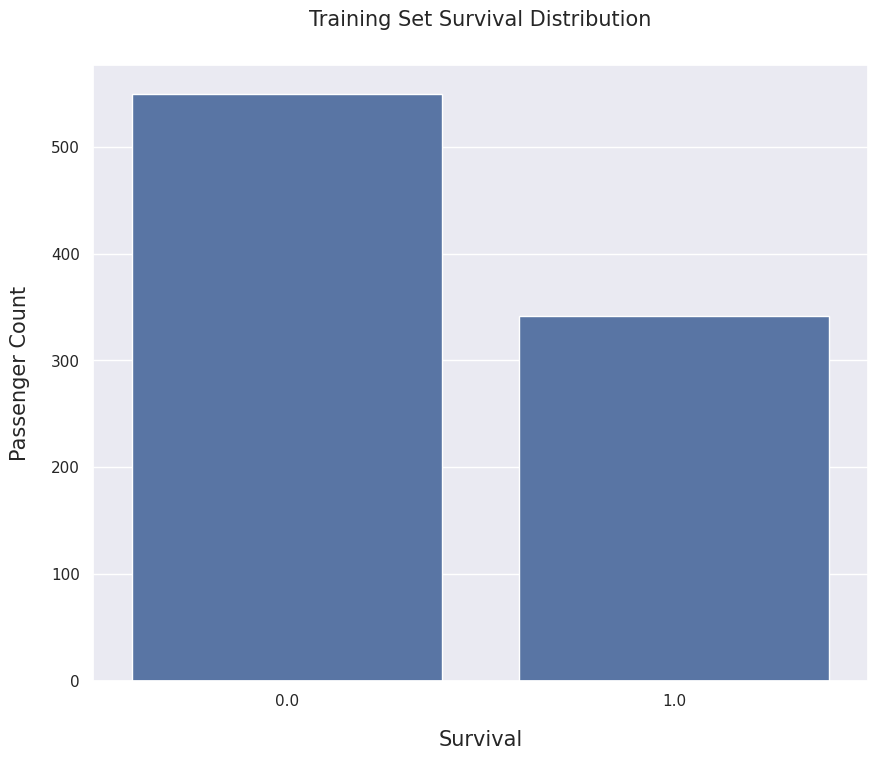

In [16]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Survived', data=df_train)

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)

plt.title('Training Set Survival Distribution', size=15, y=1.05)

plt.show()


In [17]:
def get_filtered_correlations(df, drop_cols=None, threshold=0.1):
    df_numeric = df.select_dtypes(exclude=['object'])
    if drop_cols:
        df_numeric = df_numeric.drop(columns=drop_cols, errors='ignore')
    corr_matrix = df_numeric.corr().abs()
    corr_pairs = (
        corr_matrix.unstack()
        .reset_index()
        .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation Coefficient"})
        .sort_values(by="Correlation Coefficient", ascending=False, kind="quicksort")
    )
    corr_pairs = corr_pairs.iloc[::2].reset_index(drop=True)
    corr_pairs = corr_pairs[corr_pairs["Correlation Coefficient"] < 1.0]
    return corr_pairs[corr_pairs["Correlation Coefficient"] > threshold]
df_train_corr_nd = get_filtered_correlations(df_train, drop_cols=['PassengerId'], threshold=0.1)
df_test_corr_nd = get_filtered_correlations(df_test, threshold=0.1)


In [18]:
df_test_corr_nd

Feature 1 Feature 2  Correlation Coefficient
3      Fare    Pclass                 0.577489
4    Pclass       Age                 0.526789
5       Age      Fare                 0.345347
6     SibSp     Parch                 0.306895
7      Fare     Parch                 0.230410
8      Fare     SibSp                 0.172032

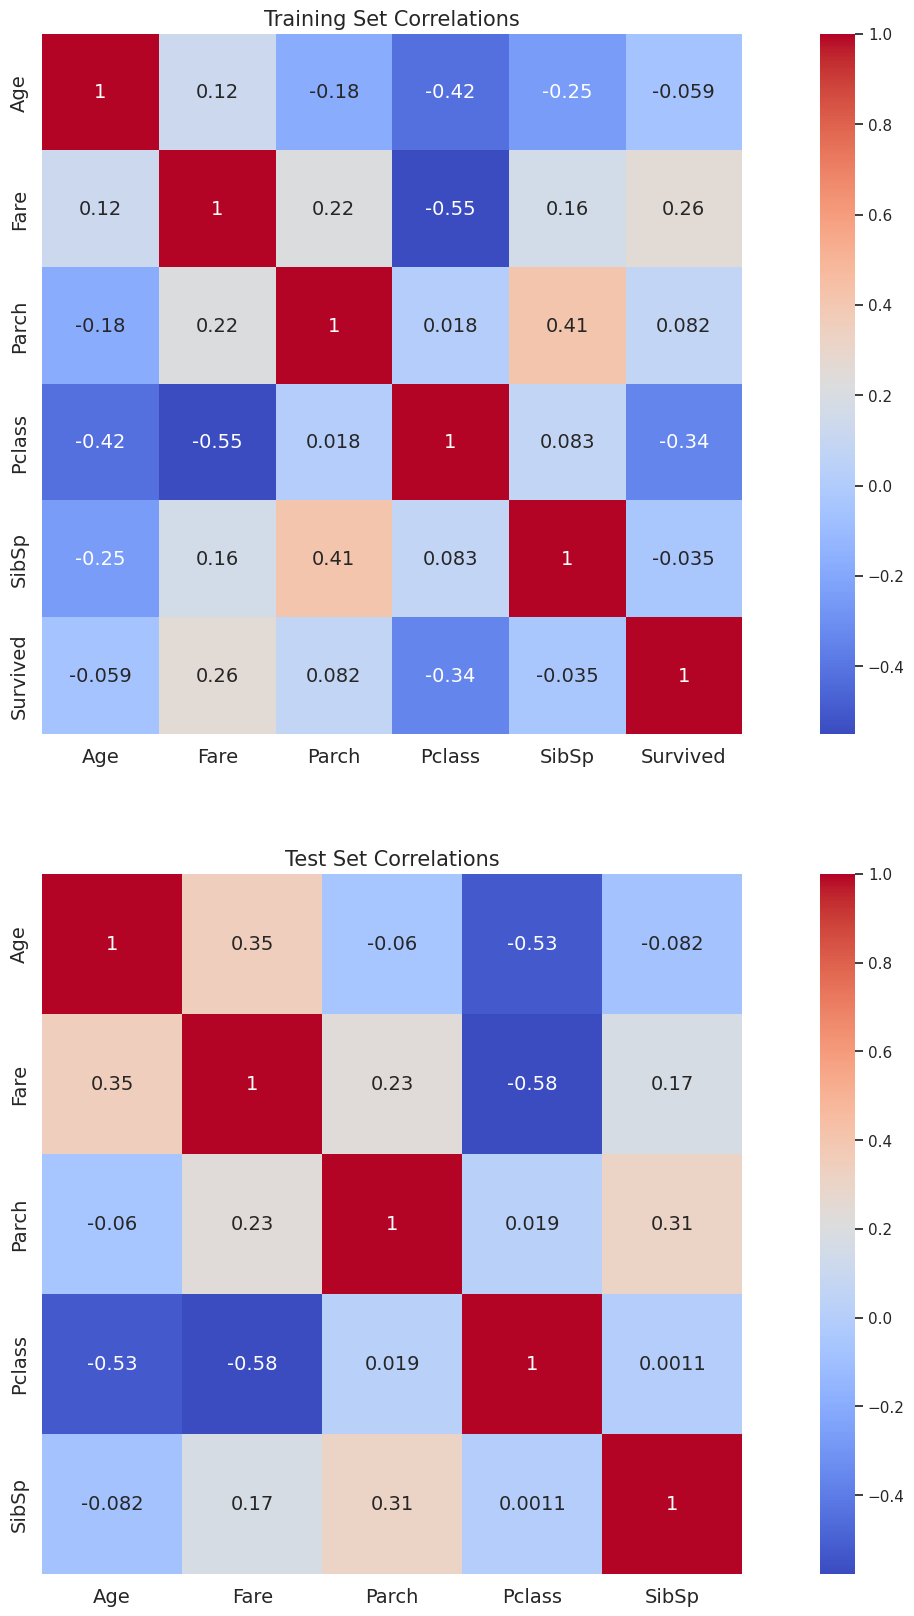

In [20]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(df_train.select_dtypes(exclude=['object']).drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(df_test.select_dtypes(exclude=['object']).drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)

axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

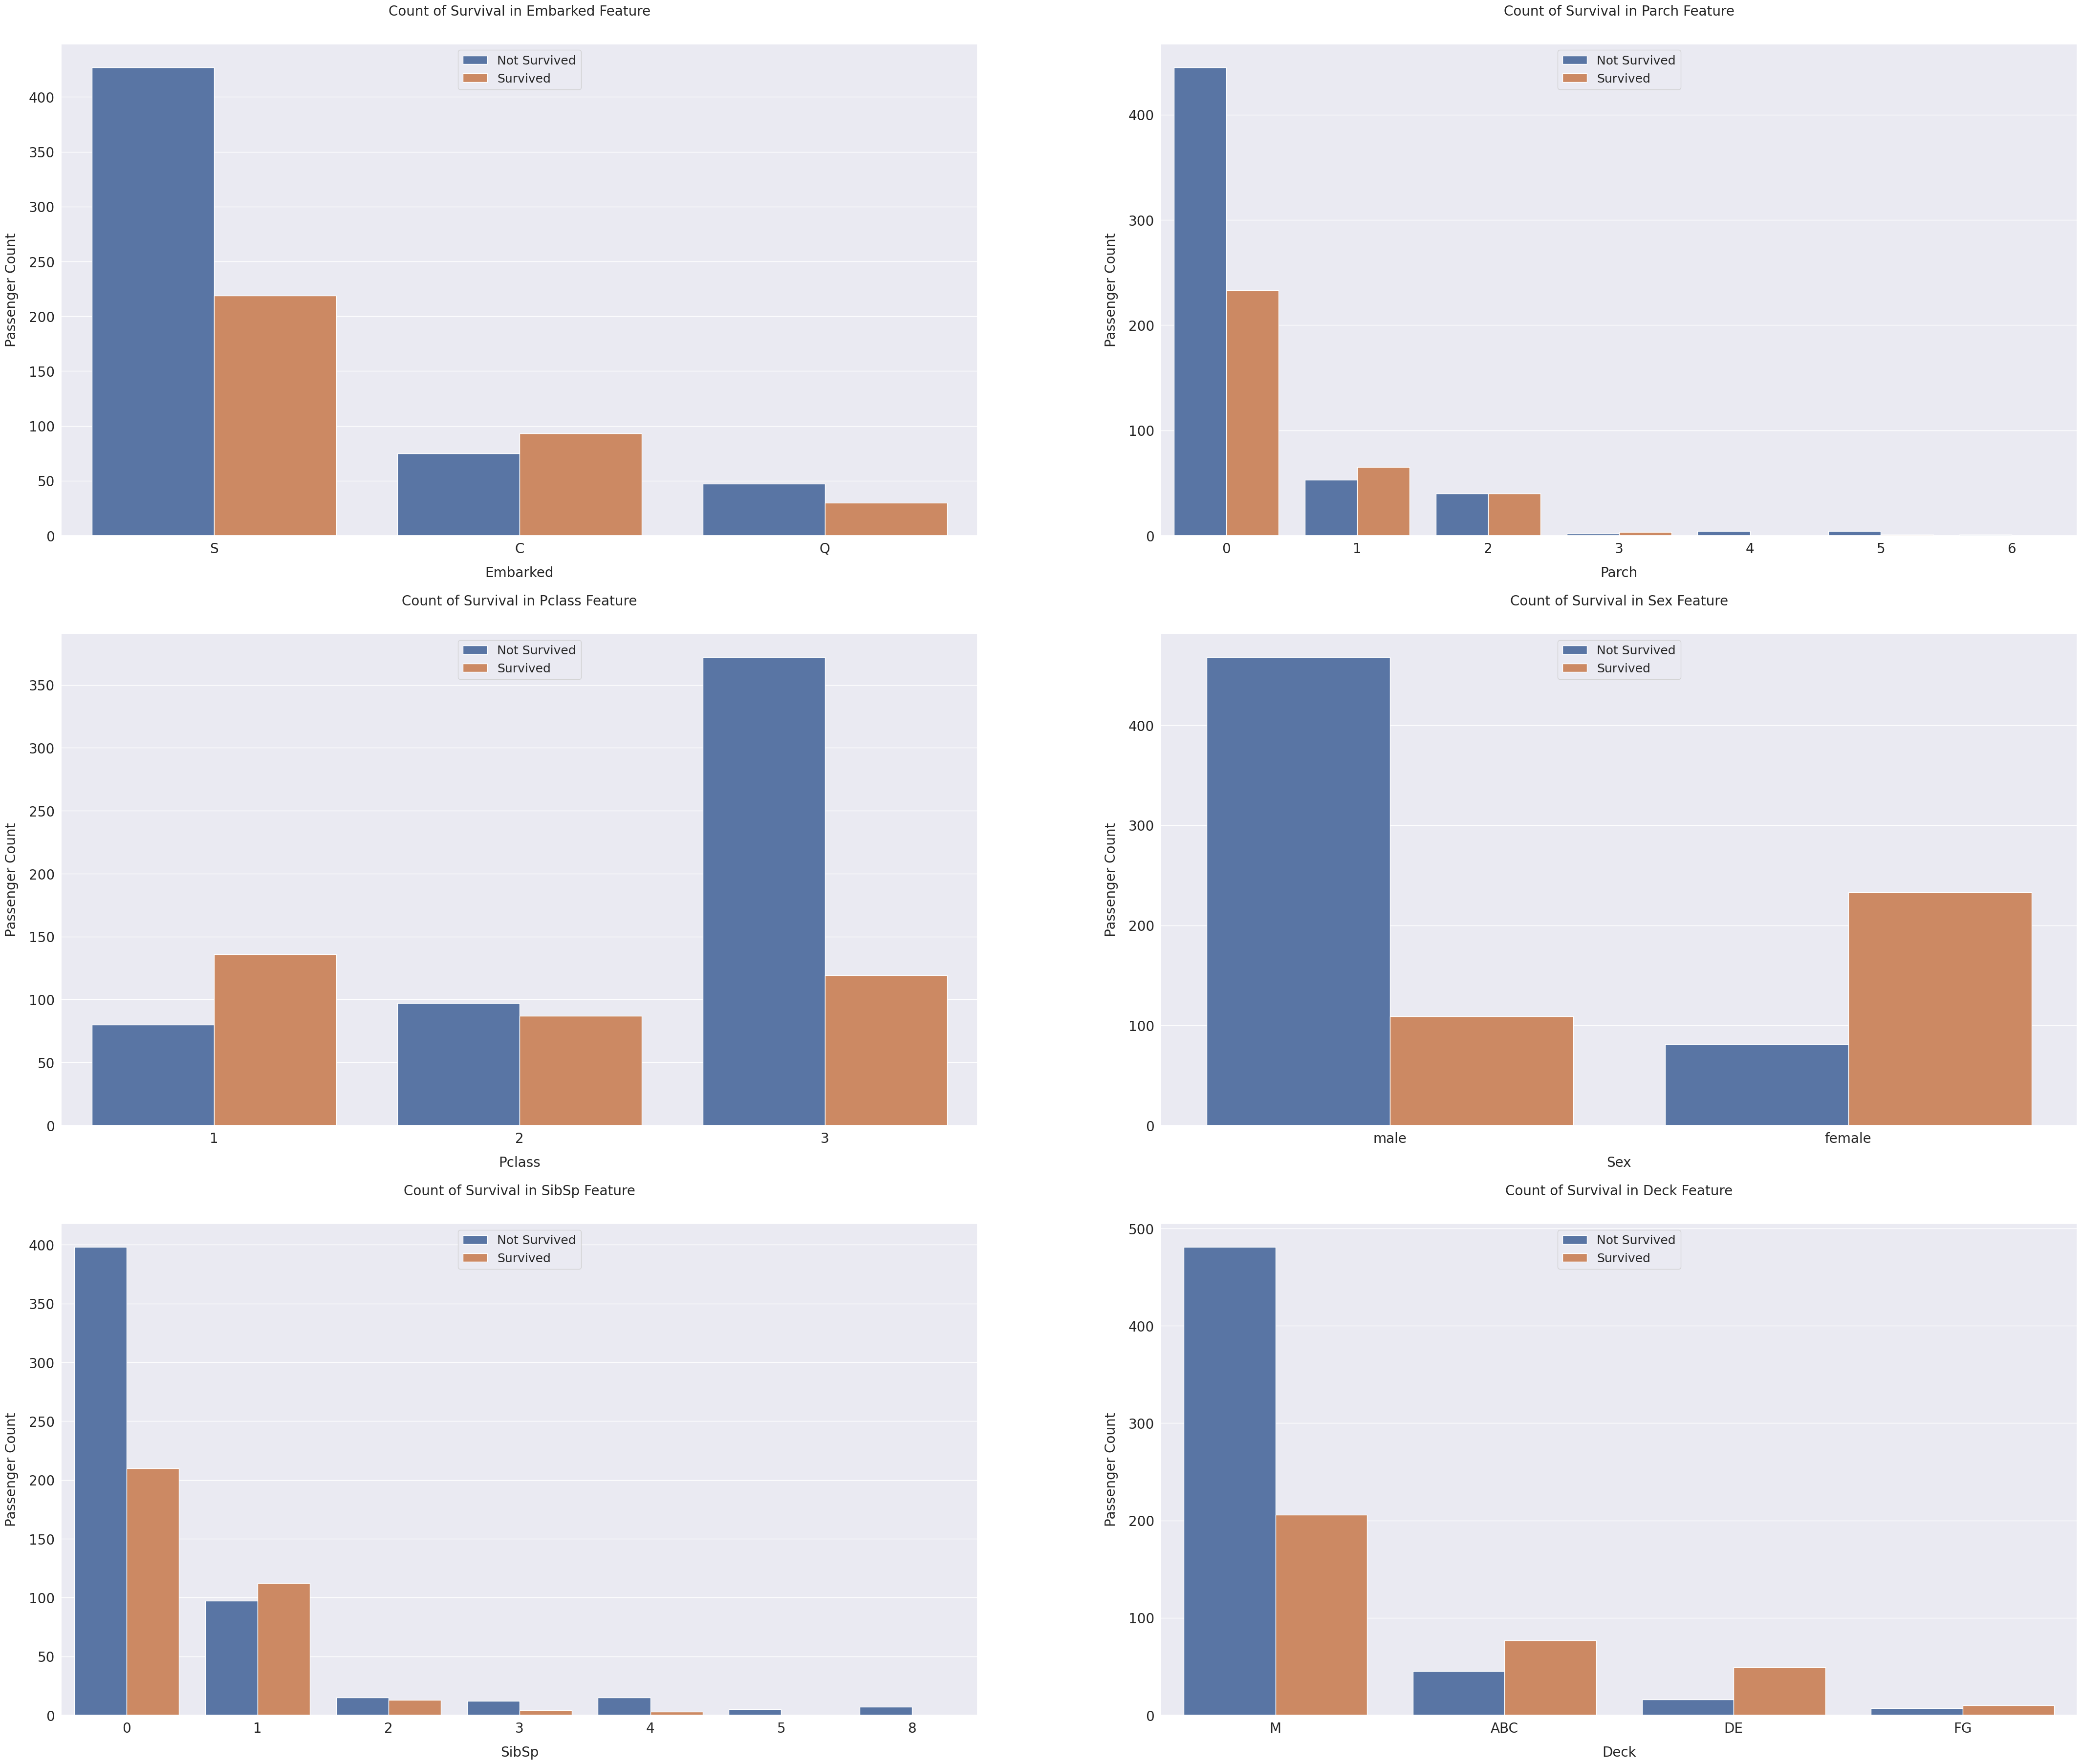

In [21]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(30, 30))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    sns.countplot(x=feature, hue='Survived', data=df_train, ax=ax)
    ax.set_xlabel(feature, size=20, labelpad=15)
    ax.set_ylabel('Passenger Count', size=20, labelpad=15)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    ax.set_title(f'Count of Survival in {feature} Feature', size=20, y=1.05)


In [22]:
df_all = concat_df(df_train, df_test)
df_all.head()


Age Deck Embarked     Fare  \
0  22.0    M        S   7.2500   
1  38.0  ABC        C  71.2833   
2  26.0    M        S   7.9250   
3  35.0  ABC        S  53.1000   
4  35.0    M        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450

In [23]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)


<Axes: xlabel='Fare', ylabel='count'>

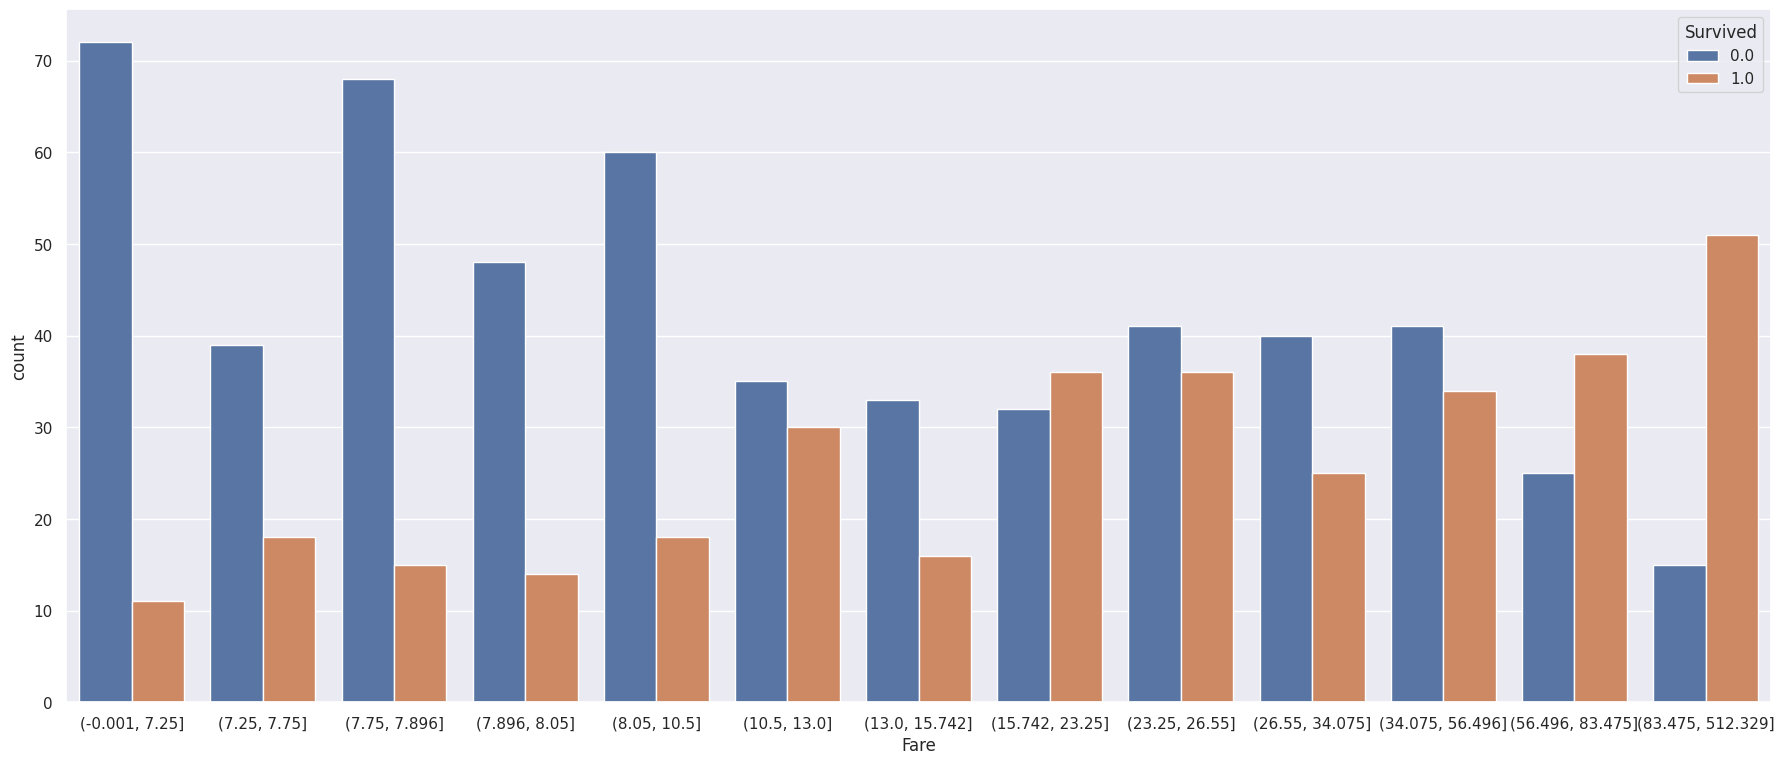

In [24]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)


#Family Size

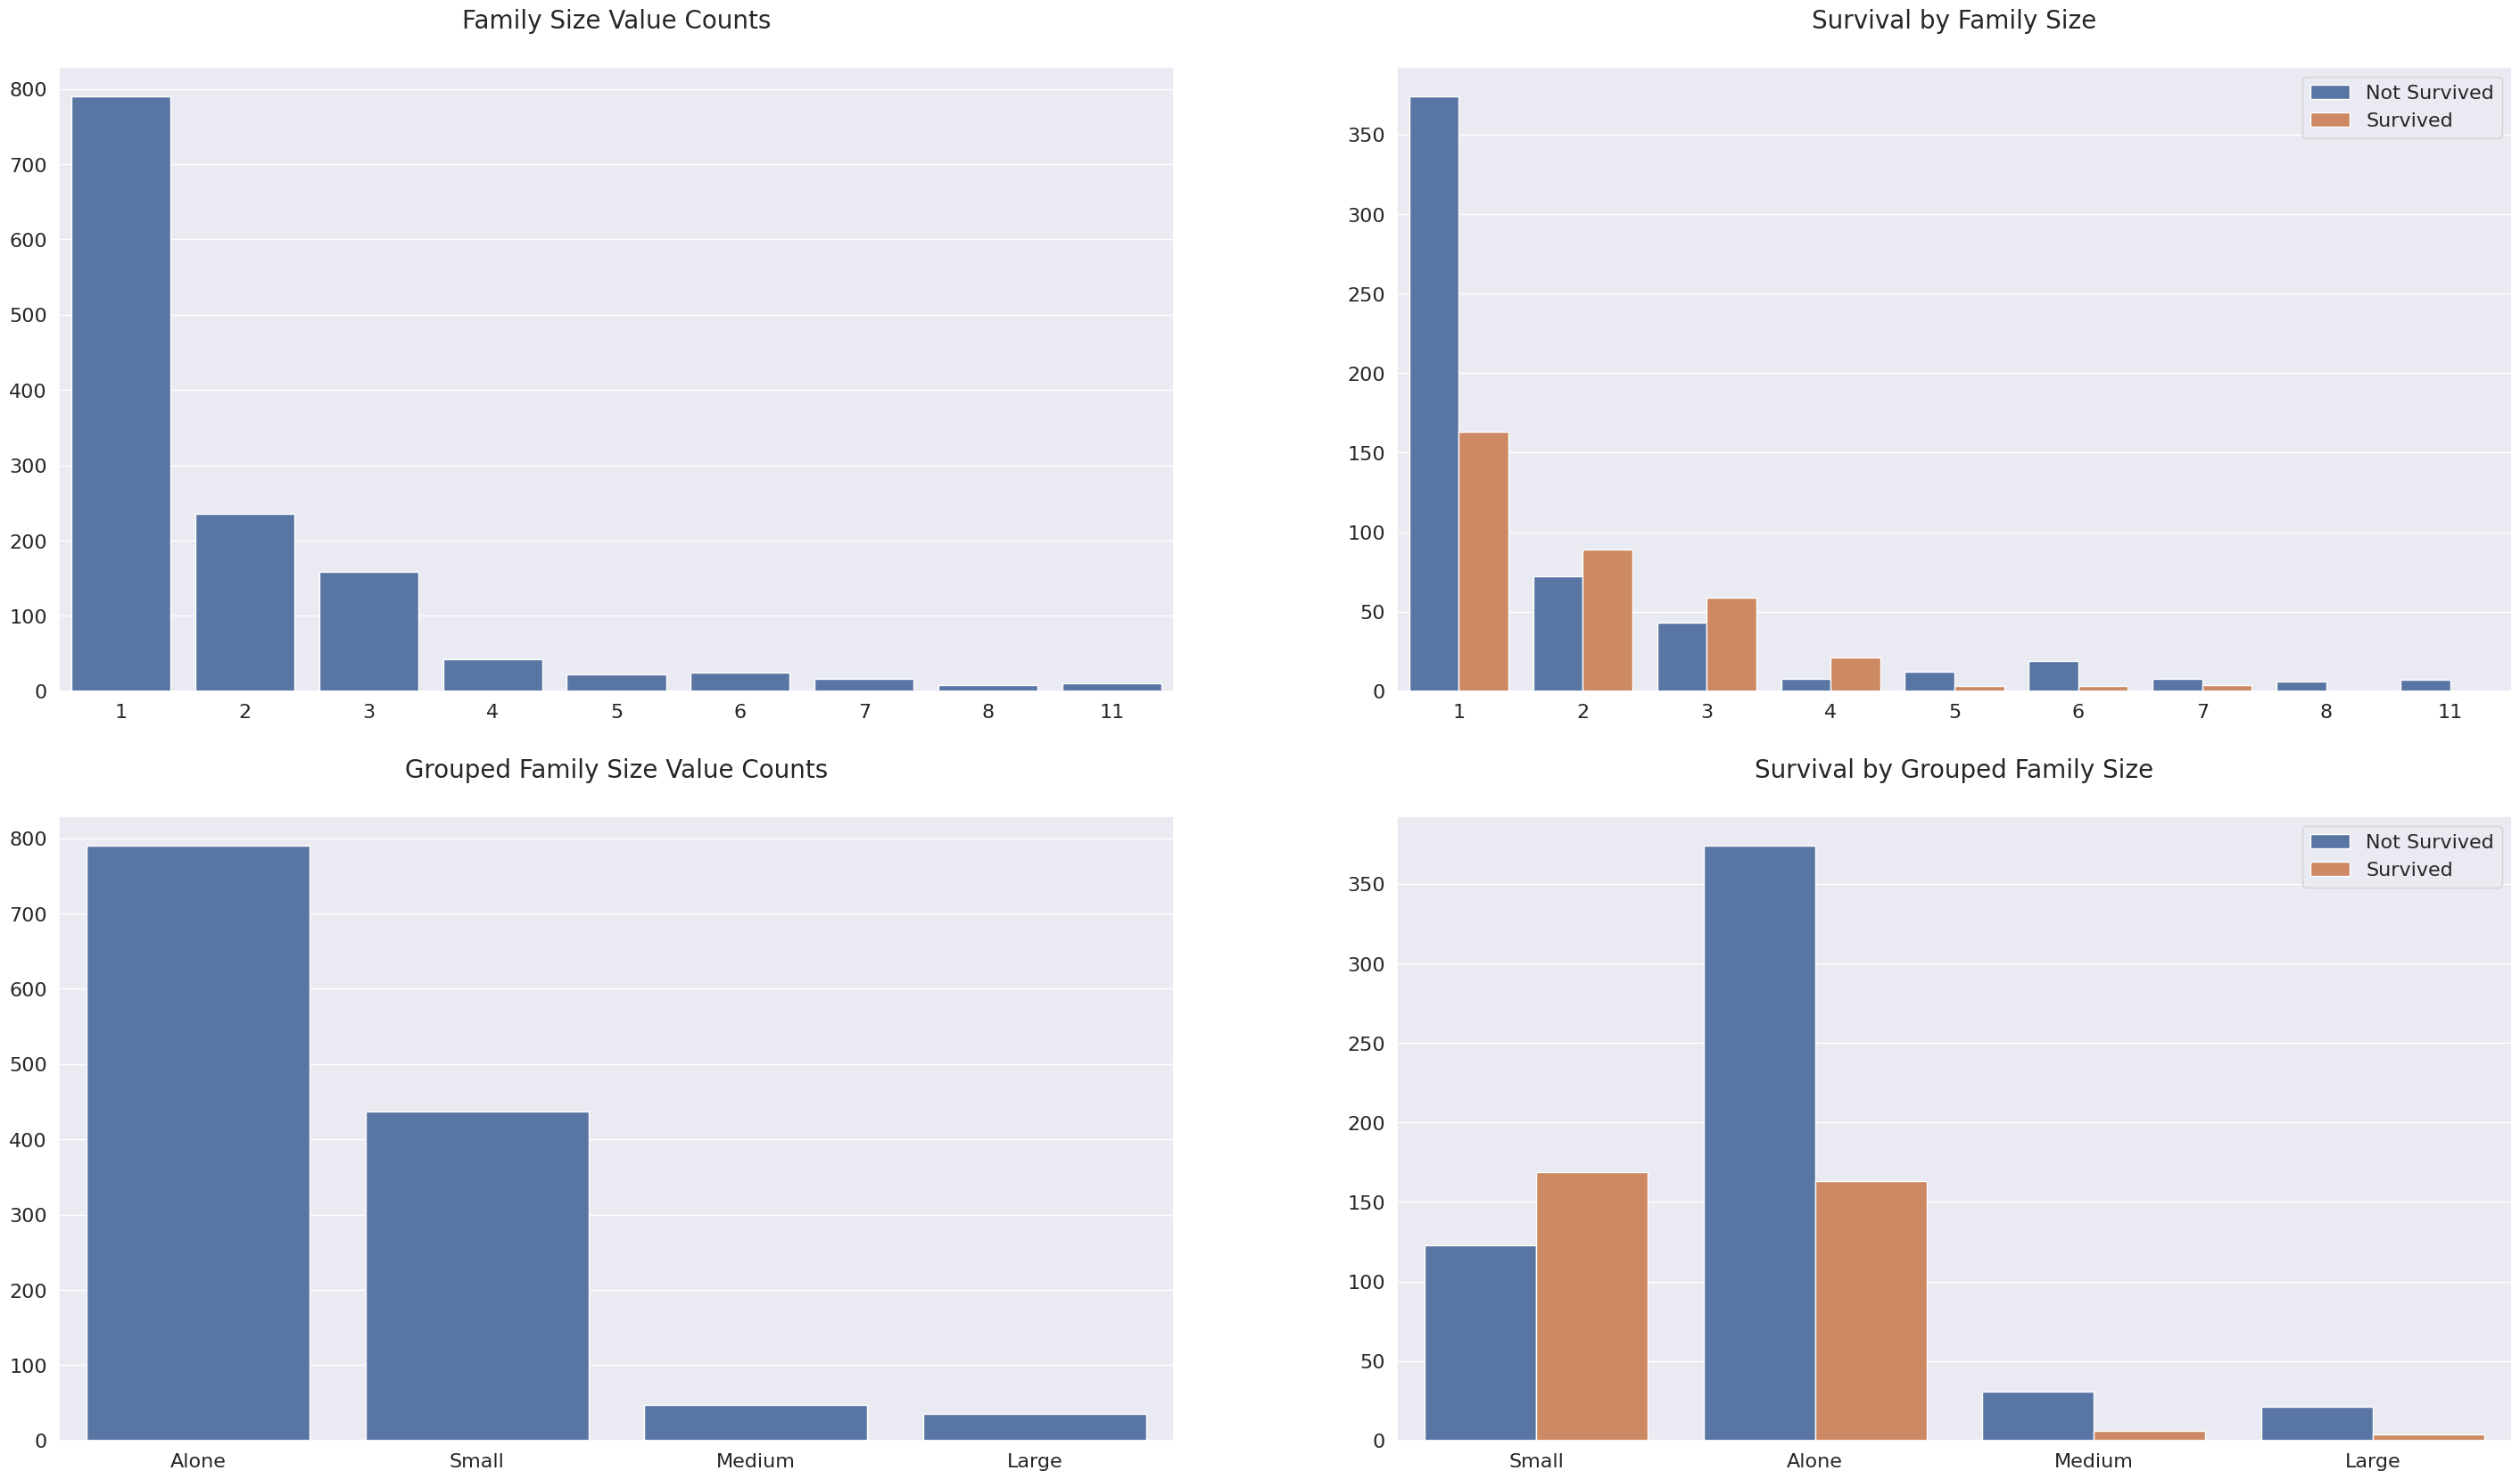

In [25]:

df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

family_map = {
    1: 'Alone',
    2: 'Small', 3: 'Small', 4: 'Small',
    5: 'Medium', 6: 'Medium',
    7: 'Large', 8: 'Large', 11: 'Large'
}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

sns.barplot(
    x=df_all['Family_Size'].value_counts().sort_index().index,
    y=df_all['Family_Size'].value_counts().sort_index().values,
    ax=axs[0][0]
)
axs[0][0].set_title('Family Size Value Counts', fontsize=20, y=1.05)

sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])
axs[0][1].set_title('Survival by Family Size', fontsize=20, y=1.05)

sns.barplot(
    x=df_all['Family_Size_Grouped'].value_counts().index,
    y=df_all['Family_Size_Grouped'].value_counts().values,
    ax=axs[1][0]
)
axs[1][0].set_title('Grouped Family Size Value Counts', fontsize=20, y=1.05)

sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])
axs[1][1].set_title('Survival by Grouped Family Size', fontsize=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 16})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=16)
        axs[i][j].tick_params(axis='y', labelsize=16)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()


In [27]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')


In [28]:
df_all.sample(20)

Age Deck Embarked              Fare  \
989   20.0    M        S     (7.75, 7.896]   
1206  17.0    M        Q      (7.25, 7.75]   
509   26.0    M        S  (34.075, 56.496]   
75    25.0   FG        S      (7.25, 7.75]   
135   23.0    M        C    (13.0, 15.742]   
312   26.0    M        S    (23.25, 26.55]   
182    9.0    M        S   (26.55, 34.075]   
220   16.0    M        S     (7.896, 8.05]   
1272  26.0    M        Q     (7.75, 7.896]   
1270   5.0    M        S   (26.55, 34.075]   
327   36.0   DE        S      (10.5, 13.0]   
1251  14.5    M        S  (56.496, 83.475]   
53    29.0    M        S    (23.25, 26.55]   
682   20.0    M        S      (8.05, 10.5]   
738   25.0    M        S     (7.75, 7.896]   
968   55.0  ABC        S    (23.25, 26.55]   
329   16.0  ABC        C  (56.496, 83.475]   
1027  26.5    M        C    (-0.001, 7.25]   
382   32.0    M        S     (7.896, 8.05]   
872   33.0  ABC        S    (-0.001, 7.25]   

                                                   Name  Parch  PassengerId  \
989                        Braf, Miss. Elin Ester Maria      0          990   
1206                               Hagardon, Miss. Kate      0         1207   
509                                      Lang, Mr. Fang      0          510   
75                              Moen, Mr. Sigurd Hansen      0           76   
135                                  Richard, Mr. Emile      0          136   
312               Lahtinen, Mrs. William (Anna Sylfven)      1          313   
182               Asplund, Master. Clarence Gustaf Hugo      2          183   
220                      Sunderland, Mr. Victor Francis      0          221   
1272                                  Foley, Mr. Joseph      0         1273   
1270                        Asplund, Master. Carl Edgar      2         1271   
327                             Ball, Mrs. (Ada E Hall)      0          328   
1251                        Sage, Master. William Henry      2         1252   
53    Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...      0           54   
682                         Olsvigen, Mr. Thor Anderson      0          683   
738                                  Ivanoff, Mr. Kanio      0          739   
968   Cornell, Mrs. Robert Clifford (Malvina Helen L...      0          969   
329                        Hippach, Miss. Jean Gertrude      1          330   
1027                          Zakarian, Mr. Mapriededer      0         1028   
382                                  Tikkanen, Mr. Juho      0          383   
872                            Carlsson, Mr. Frans Olof      0          873   

      Pclass     Sex  SibSp  Survived             Ticket  Family_Size  \
989        3  female      0       NaN             347471            1   
1206       3  female      0       NaN        AQ/3. 30631            1   
509        3    male      0       1.0               1601            1   
75         3    male      0       0.0             348123            1   
135        2    male      0       0.0      SC/PARIS 2133            1   
312        2  female      1       0.0             250651            3   
182        3    male      4       0.0             347077            7   
220        3    male      0       1.0    SOTON/OQ 392089            1   
1272       3    male      0       NaN             330910            1   
1270       3    male      4       NaN             347077            7   
327        2  female      0       1.0              28551            1   
1251       3    male      8       NaN           CA. 2343           11   
53         2  female      1       1.0               2926            2   
682        3    male      0       0.0               6563            1   
738        3    male      0       0.0             349201            1   
968        1  female      2       NaN              11770            3   
329        1  female      0       1.0             111361            2   
1027       3    male      0       NaN               2656          

In [29]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

In [30]:
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')


In [31]:
df_all

Age Deck Embarked               Fare  \
0     22.0    M        S     (-0.001, 7.25]   
1     38.0  ABC        C   (56.496, 83.475]   
2     26.0    M        S      (7.896, 8.05]   
3     35.0  ABC        S   (34.075, 56.496]   
4     35.0    M        S      (7.896, 8.05]   
...    ...  ...      ...                ...   
1304  25.0    M        S      (7.896, 8.05]   
1305  39.0  ABC        C  (83.475, 512.329]   
1306  38.5    M        S     (-0.001, 7.25]   
1307  25.0    M        S      (7.896, 8.05]   
1308  25.0    M        C    (15.742, 23.25]   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0            5   
...                                                 ...    ...          ...   
1304                                 Spector, Mr. Woolf      0         1305   
1305                       Oliva y Ocana, Dona. Fermina      0         1306   
1306                       Saether, Mr. Simon Sivertsen      0         1307   
1307                                Ware, Mr. Frederick      0         1308   
1308                           Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  Survived              Ticket  Family_Size  \
0          3    male      1       0.0           A/5 21171            2   
1          1  female      1       1.0            PC 17599            2   
2          3  female      0       1.0    STON/O2. 3101282            1   
3          1  female      1       1.0              113803            2   
4          3    male      0       0.0              373450            1   
...      ...     ...    ...       ...                 ...          ...   
1304       3    male      0       NaN           A.5. 3236            1   
1305       1  female      0       NaN            PC 17758            1   
1306       3    male      0       NaN  SOTON/O.Q. 3101262            1   
1307       3    male      0       NaN              359309            1   
1308       3    male      1       NaN                2668            3   

     Family_Size_Grouped  Ticket_Frequency        Title  Is_Married  
0                  Small                 1           Mr           0  
1                  Small                 2  Miss/Mrs/Ms           1  
2                  Alone                 1  Miss/Mrs/Ms           0  
3                  Small                 2  Miss/Mrs/Ms           1  
4                  Alone                 1           Mr           0  
...                  ...               ...          ...         ...  
1304               Alone                 1           Mr           0  
1305               Alone                 3  Miss/Mrs/Ms           0  
1306               Alone                 1           Mr           0  
1307               Alone                 1           Mr           0  
1308               Small                 3       Master           0  

[1309 rows x 17 columns]

In [32]:
def extract_surname(data):

    families = []

    for i in range(len(data)):
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name

        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]

        for c in string.punctuation:
            family = family.replace(c, '').strip()

        families.append(family)

    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]


In [33]:
non_unique_families = set(df_train['Family']).intersection(df_test['Family'])
non_unique_tickets = set(df_train['Ticket']).intersection(df_test['Ticket'])

df_family_survival_rate = df_train.groupby('Family')[['Survived', 'Family_Size']].median()
df_ticket_survival_rate = df_train.groupby('Ticket')[['Survived', 'Ticket_Frequency']].median()

family_rates = df_family_survival_rate[
    (df_family_survival_rate.index.isin(non_unique_families)) &
    (df_family_survival_rate['Family_Size'] > 1)
]['Survived'].to_dict()

ticket_rates = df_ticket_survival_rate[
    (df_ticket_survival_rate.index.isin(non_unique_tickets)) &
    (df_ticket_survival_rate['Ticket_Frequency'] > 1)
]['Survived'].to_dict()


In [34]:
mean_survival_rate = df_train['Survived'].mean()

def get_rate(mapping, key, default):
    return mapping.get(key, default)

def has_value(mapping, key):
    return int(key in mapping)

df_train['Family_Survival_Rate'] = df_train['Family'].map(lambda x: get_rate(family_rates, x, mean_survival_rate))
df_train['Family_Survival_Rate_NA'] = df_train['Family'].map(lambda x: has_value(family_rates, x))

df_test['Family_Survival_Rate'] = df_test['Family'].map(lambda x: get_rate(family_rates, x, mean_survival_rate))
df_test['Family_Survival_Rate_NA'] = df_test['Family'].map(lambda x: has_value(family_rates, x))

df_train['Ticket_Survival_Rate'] = df_train['Ticket'].map(lambda x: get_rate(ticket_rates, x, mean_survival_rate))
df_train['Ticket_Survival_Rate_NA'] = df_train['Ticket'].map(lambda x: has_value(ticket_rates, x))

df_test['Ticket_Survival_Rate'] = df_test['Ticket'].map(lambda x: get_rate(ticket_rates, x, mean_survival_rate))
df_test['Ticket_Survival_Rate_NA'] = df_test['Ticket'].map(lambda x: has_value(ticket_rates, x))


In [35]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2


In [36]:
df

Age Deck Embarked               Fare  \
891   34.5    M        Q      (7.75, 7.896]   
892   47.0    M        S     (-0.001, 7.25]   
893   62.0    M        Q       (8.05, 10.5]   
894   27.0    M        S       (8.05, 10.5]   
895   22.0    M        S       (10.5, 13.0]   
...    ...  ...      ...                ...   
1304  25.0    M        S      (7.896, 8.05]   
1305  39.0  ABC        C  (83.475, 512.329]   
1306  38.5    M        S     (-0.001, 7.25]   
1307  25.0    M        S      (7.896, 8.05]   
1308  25.0    M        C    (15.742, 23.25]   

                                              Name  Parch  PassengerId  \
891                               Kelly, Mr. James      0          892   
892               Wilkes, Mrs. James (Ellen Needs)      0          893   
893                      Myles, Mr. Thomas Francis      0          894   
894                               Wirz, Mr. Albert      0          895   
895   Hirvonen, Mrs. Alexander (Helga E Lindqvist)      1          896   
...                                            ...    ...          ...   
1304                            Spector, Mr. Woolf      0         1305   
1305                  Oliva y Ocana, Dona. Fermina      0         1306   
1306                  Saether, Mr. Simon Sivertsen      0         1307   
1307                           Ware, Mr. Frederick      0         1308   
1308                      Peter, Master. Michael J      1         1309   

      Pclass     Sex  SibSp  ...  Ticket_Frequency        Title  Is_Married  \
891        3    male      0  ...                 1           Mr           0   
892        3  female      1  ...                 1  Miss/Mrs/Ms           1   
893        2    male      0  ...                 1           Mr           0   
894        3    male      0  ...                 1           Mr           0   
895        3  female      1  ...                 2  Miss/Mrs/Ms           1   
...      ...     ...    ...  ...               ...          ...         ...   
1304       3    male      0  ...                 1           Mr           0   
1305       1  female      0  ...                 3  Miss/Mrs/Ms           0   
1306       3    male      0  ...                 1           Mr           0   
1307       3    male      0  ...                 1           Mr           0   
1308       3    male      1  ...                 3       Master           0   

             Family  Family_Survival_Rate Family_Survival_Rate_NA  \
891           Kelly              0.383838                       0   
892          Wilkes              0.383838                       0   
893           Myles              0.383838                       0   
894            Wirz              0.383838                       0   
895        Hirvonen              1.000000                       1   
...             ...                   ...                     ...   
1304        Spector              0.383838                       0   
1305  Oliva y Ocana              0.383838                       0   
1306        Saether              0.383838                       0   
1307           Ware              0.383838                       0   
1308          Peter              1.000000                       1   

      Ticket_Survival_Rate Ticket_Survival_Rate_NA  Survival_Rate  \
891               0.383838                       0       0.383838   
892               0.383838                       0       0.383838   
893               0.383838                       0       0.383838   
894               0.383838                       0       0.383838   
895               1.000000                       1       1.000000   
...                    ...                     ...            ...   
1304              0.383838                       0       0.383838   
1305              0.500000                       1       0.441919   
1306              0.383838                       0       0.383838   
1307              0.383838                       0       0.383838   
1308            

In [37]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])


In [38]:
df

Age  Deck  Embarked  Fare                                          Name  \
891    45     3         1     2                              Kelly, Mr. James   
892    61     3         2     0              Wilkes, Mrs. James (Ellen Needs)   
893    75     3         1     4                     Myles, Mr. Thomas Francis   
894    34     3         2     4                              Wirz, Mr. Albert   
895    27     3         2     5  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
...   ...   ...       ...   ...                                           ...   
1304   31     3         2     3                            Spector, Mr. Woolf   
1305   52     0         0    12                  Oliva y Ocana, Dona. Fermina   
1306   51     3         2     0                  Saether, Mr. Simon Sivertsen   
1307   31     3         2     3                           Ware, Mr. Frederick   
1308   31     3         0     7                      Peter, Master. Michael J   

      Parch  PassengerId  Pclass  Sex  SibSp  ...  Ticket_Frequency Title  \
891       0          892       3    1      0  ...                 1     3   
892       0          893       3    0      1  ...                 1     2   
893       0          894       2    1      0  ...                 1     3   
894       0          895       3    1      0  ...                 1     3   
895       1          896       3    0      1  ...                 2     2   
...     ...          ...     ...  ...    ...  ...               ...   ...   
1304      0         1305       3    1      0  ...                 1     3   
1305      0         1306       1    0      0  ...                 3     2   
1306      0         1307       3    1      0  ...                 1     3   
1307      0         1308       3    1      0  ...                 1     3   
1308      1         1309       3    1      1  ...                 3     1   

      Is_Married         Family  Family_Survival_Rate  \
891            0          Kelly              0.383838   
892            1         Wilkes              0.383838   
893            0          Myles              0.383838   
894            0           Wirz              0.383838   
895            1       Hirvonen              1.000000   
...          ...            ...                   ...   
1304           0        Spector              0.383838   
1305           0  Oliva y Ocana              0.383838   
1306           0        Saether              0.383838   
1307           0           Ware              0.383838   
1308           0          Peter              1.000000   

      Family_Survival_Rate_NA  Ticket_Survival_Rate Ticket_Survival_Rate_NA  \
891                         0              0.383838                       0   
892                         0              0.383838                       0   
893                         0              0.383838                       0   
894                         0              0.383838                       0   
895                         1              1.000000                       1   
...                       ...                   ...                     ...   
1304                        0              0.383838                       0   
1305                        0              0.500000                       1   
1306                        0              0.383838                       0   
1307                        0              0.383838                       0   
1308                        1              1.000000                       1   

      Survival_Rate  Survival_Rate_NA  
891        0.383838               0.0  
892        0.383838               0.0  
893        0.383838               0.0  
894        0.383838               0.0  
895        1.000000               1.0  
...             ...               ...  
1304       0.383838               0.0  
1305       0.441919               0.5  
1306       0.383838               0.0  
1307       0.383838               0.0  
1308       1.000000               

In [39]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']

df_all = pd.concat([df_train, df_test], axis=0)

df_all_encoded = pd.get_dummies(df_all, columns=cat_features, drop_first=False)

df_train= df_all_encoded.loc[df_train.index].copy()
df_test = df_all_encoded.loc[df_test.index].copy()


In [40]:

df_all = concat_df(df_train, df_test)
drop_cols = ['Family', 'Family_Size', 'Survived',
             'Name', 'Parch', 'PassengerId', 'SibSp', 'Ticket',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA','Survival_Rate_NA', 'Deck_2', 'Family_Size_Grouped_1', 'Embarked_2', 'Family_Size_Grouped_2', 'Deck_0', 'Pclass_3', 'Title_1', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

Age  Deck_1  Deck_3  Embarked_0  Embarked_1  Family_Size_Grouped_0  \
0   28   False    True       False       False                  False   
1   52   False   False        True       False                  False   
2   34   False    True       False       False                   True   
3   48   False   False       False       False                  False   
4   48   False    True       False       False                   True   

   Family_Size_Grouped_3  Fare  Pclass_1  Pclass_2  Sex_0  Sex_1  \
0                   True     0     False     False  False   True   
1                   True    11      True     False   True  False   
2                  False     3     False     False   True  False   
3                   True    10      True     False   True  False   
4                  False     3     False     False  False   True   

   Survival_Rate  Ticket_Frequency  Title_0  Title_2  Title_3  
0       0.383838                 1    False    False     True  
1       1.000000                 2    False     True    False  
2       0.383838                 1    False     True    False  
3       0.383838                 2    False     True    False  
4       0.383838                 1    False    False     True

In [41]:
df_all.head()

Age  Deck_1  Deck_3  Embarked_0  Embarked_1  Family_Size_Grouped_0  \
0   28   False    True       False       False                  False   
1   52   False   False        True       False                  False   
2   34   False    True       False       False                   True   
3   48   False   False       False       False                  False   
4   48   False    True       False       False                   True   

   Family_Size_Grouped_3  Fare  Pclass_1  Pclass_2  Sex_0  Sex_1  \
0                   True     0     False     False  False   True   
1                   True    11      True     False   True  False   
2                  False     3     False     False   True  False   
3                   True    10      True     False   True  False   
4                  False     3     False     False  False   True   

   Survival_Rate  Ticket_Frequency  Title_0  Title_2  Title_3  
0       0.383838                 1    False    False     True  
1       1.000000                 2    False     True    False  
2       0.383838                 1    False     True    False  
3       0.383838                 2    False     True    False  
4       0.383838                 1    False    False     True

In [42]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (891, 17)
y_train shape: (891,)
X_test shape: (418, 17)


In [43]:

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

N = 5
skf = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)

probs = pd.DataFrame(0, index=np.arange(len(X_test)), columns=[f'Fold_{i}_Prob_{j}' for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(0, index=df_all.columns.drop('Survived', errors='ignore'), columns=[f'Fold_{i}' for i in range(1, N + 1)])
fprs, tprs, scores = [], [], []

oob_scores = []
per_importance = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), start=1):
    print(f'Fold {fold}\n')

    model = leaderboard_model
    model.fit(X_train[train_idx], y_train[train_idx])

    y_trn_pred = model.predict_proba(X_train[train_idx])[:, 1]
    y_val_pred = model.predict_proba(X_train[val_idx])[:, 1]

    trn_auc = auc(*roc_curve(y_train[train_idx], y_trn_pred)[:2])
    val_fpr, val_tpr, _ = roc_curve(y_train[val_idx], y_val_pred)
    val_auc = auc(val_fpr, val_tpr)

    scores.append((trn_auc, val_auc))
    fprs.append(val_fpr)
    tprs.append(val_tpr)

    test_proba = model.predict_proba(X_test)
    probs[f'Fold_{fold}_Prob_0'] = test_proba[:, 0]
    probs[f'Fold_{fold}_Prob_1'] = test_proba[:, 1]

    if hasattr(model, "feature_importances_"):
        importances[f'Fold_{fold}'] = model.feature_importances_

    if hasattr(model, "oob_score_"):
        print(f'Fold {fold} OOB Score: {model.oob_score_:.4f}\n')
        oob_scores.append(model.oob_score_)

    # per_result = permutation_importance(
    #     model,
    #     X_train[val_idx],             # –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–∏, –Ω–µ –Ω–∞ —Ç—Ä–µ–π–Ω–µ!)
    #     y_train[val_idx],             # –æ—Ç–≤–µ—Ç—ã
    #     n_repeats= ,      # —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞—Ç—å –∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫
    #     random_state=42,
    #     scoring='roc_auc'  # –ª—é–±–∞—è –º–µ—Ç—Ä–∏–∫–∞: accuracy, f1, roc_auc –∏ —Ç.–¥.
    # )
    # per_importance.append(per_result.importances_mean)

if oob_scores:
    avg_oob = sum(oob_scores) / N
    print(f'Average OOB Score: {avg_oob:.4f}')

for i, (trn, val) in enumerate(scores, 1):
    print(f"Fold {i}: Train AUC = {trn:.4f}, Validation AUC = {val:.4f}")
per_importance_df = pd.DataFrame(per_importance, columns=df_all.columns.drop('Survived', errors='ignore'))
print(per_importance_df.mean(axis=0).sort_values(ascending=False))


Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 1 OOB Score: 0.8469

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 2 OOB Score: 0.8471

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

Fold 3 OOB Score: 0.8583

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent worker

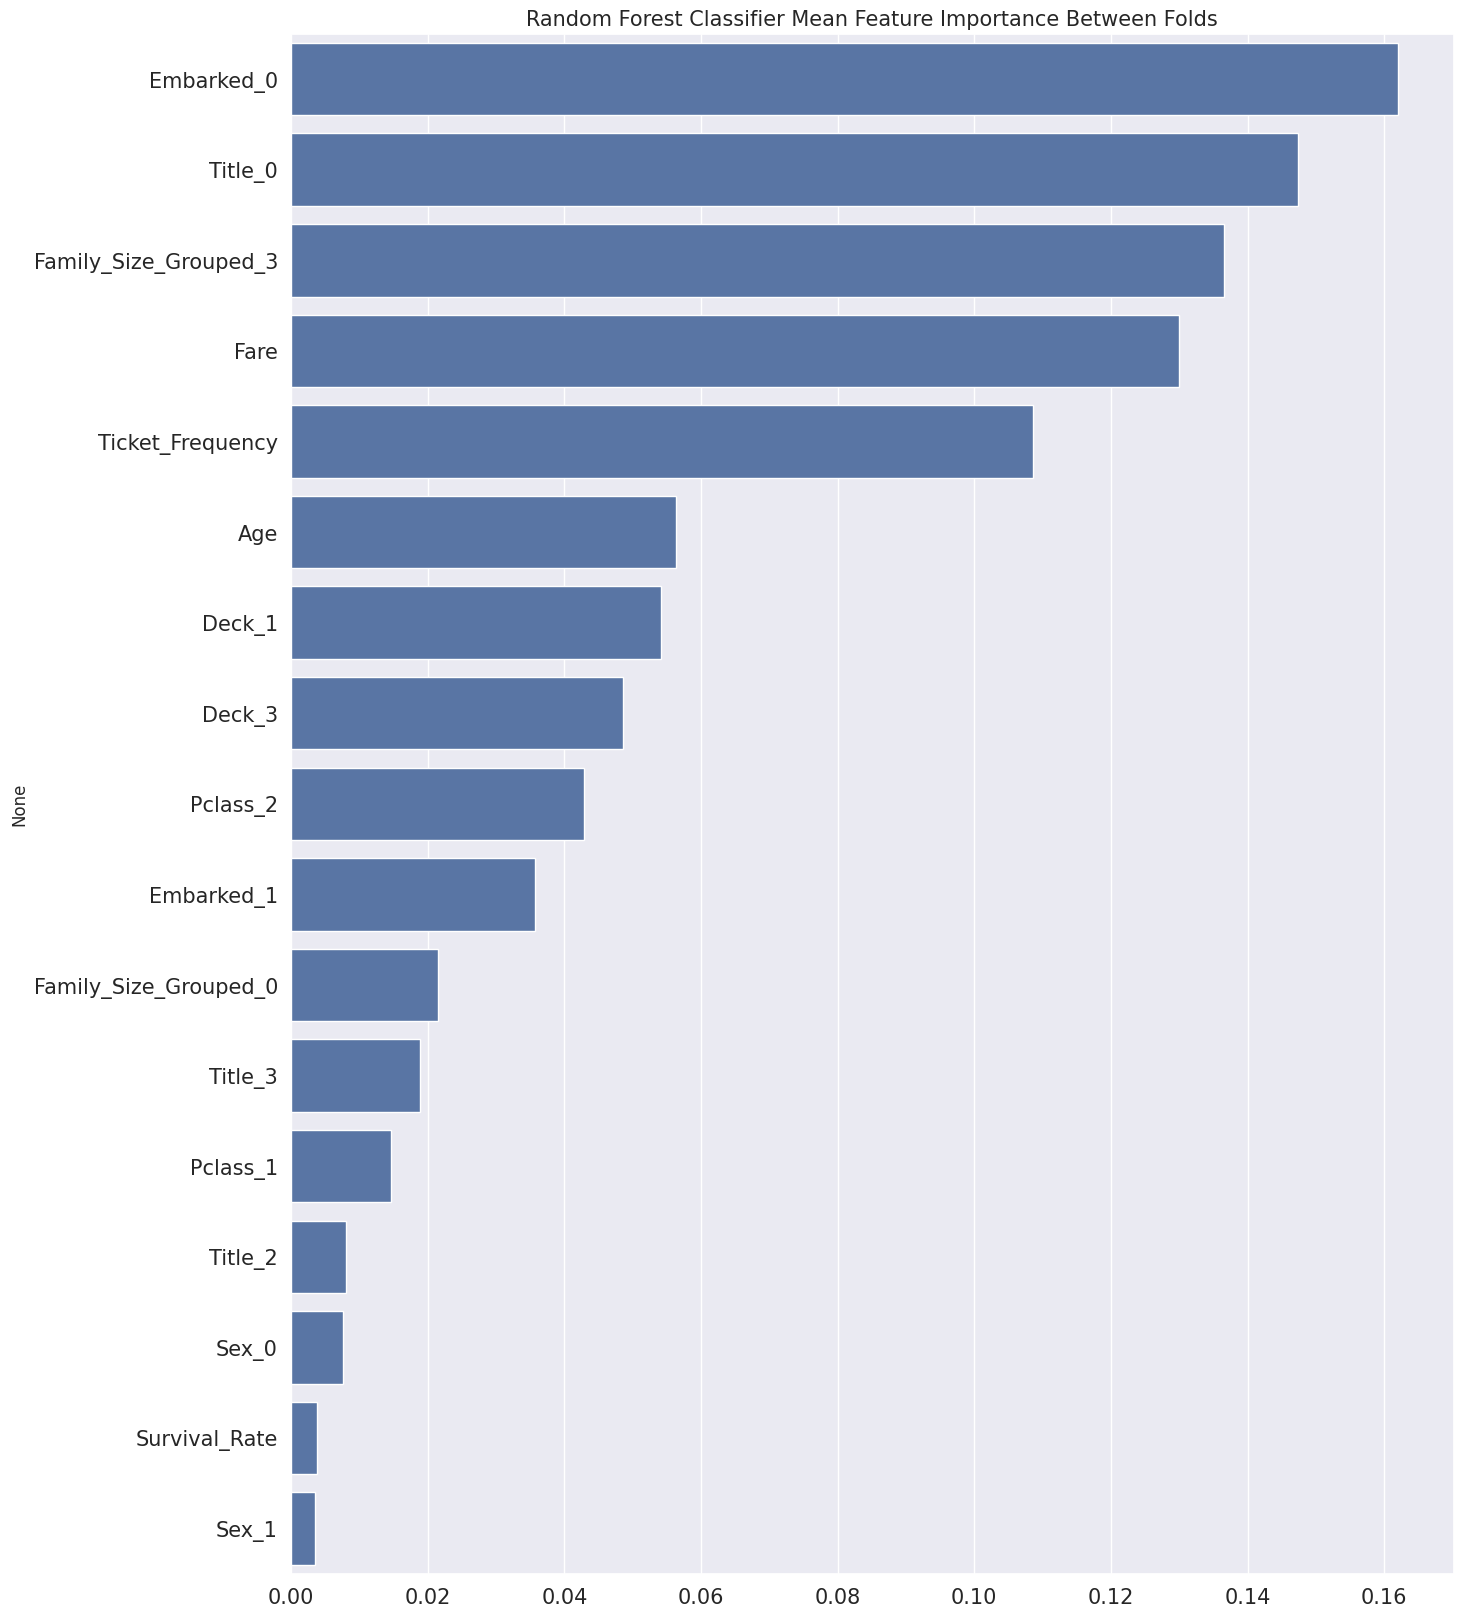

In [46]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()


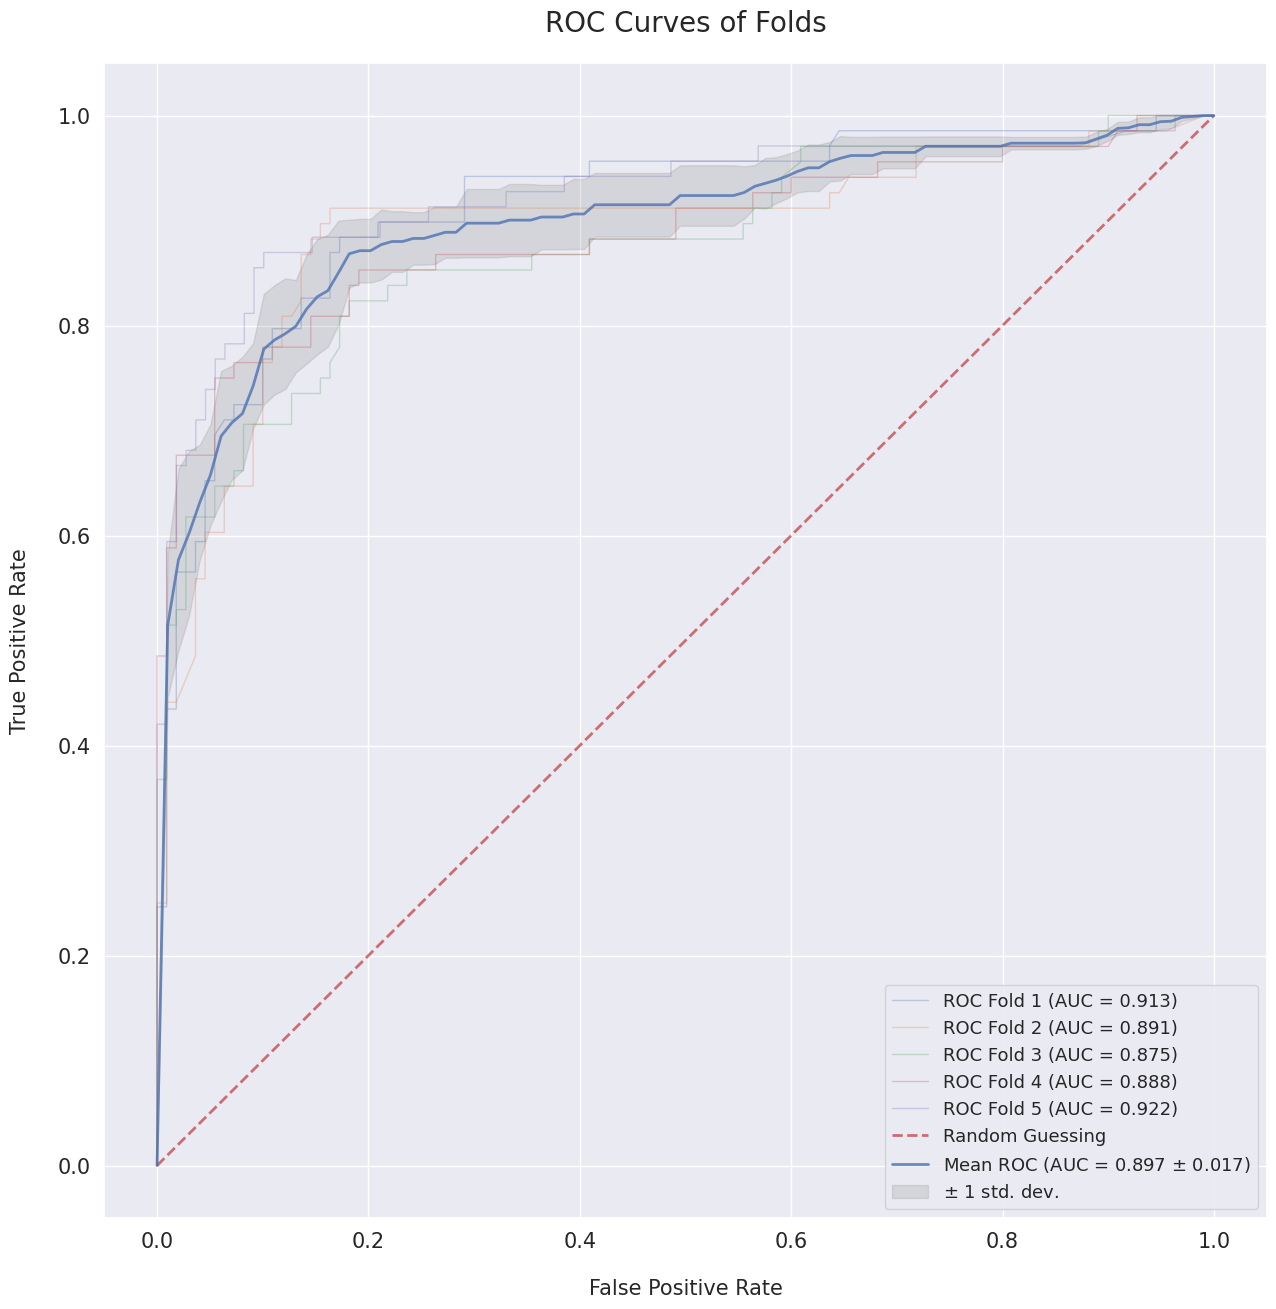

In [47]:
def plot_roc_curve(fprs, tprs):

    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))

    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))

    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')

    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)

    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')

    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})

    plt.show()

plot_roc_curve(fprs, tprs)


In [ ]:
class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = df_test['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head

<bound method NDFrame.head of       PassengerId  Survived
891           892         0
892           893         1
893           894         0
894           895         0
895           896         1
...           ...       ...
1304         1305         0
1305         1306         1
1306         1307         0
1307         1308         0
1308         1309         1

[418 rows x 2 columns]>

In [ ]:
submission_df.head()

PassengerId  Survived
891          892         0
892          893         1
893          894         0
894          895         0
895          896         1